In [18]:
# @title Import title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# @title Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/air pollution dataset.csv')
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,newCountry
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,Russian Federation
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,Brazil
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,Italy
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,Poland
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good,France


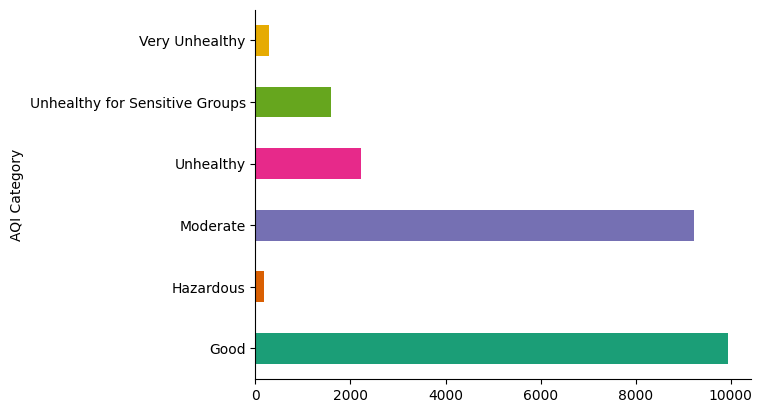

In [14]:
# @title AQI Category
data.groupby('AQI Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

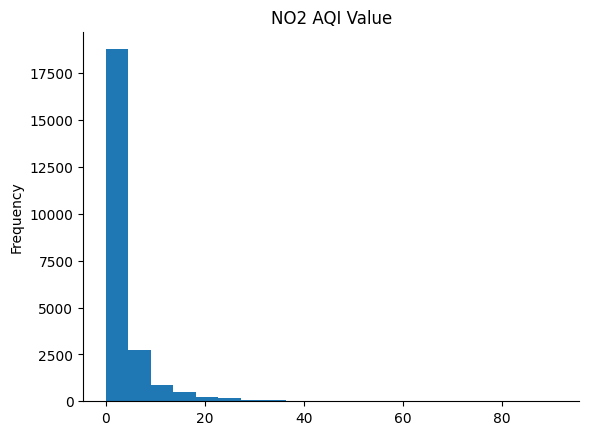

In [7]:
# @title NO2 AQI Value

from matplotlib import pyplot as plt
data['NO2 AQI Value'].plot(kind='hist', bins=20, title='NO2 AQI Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

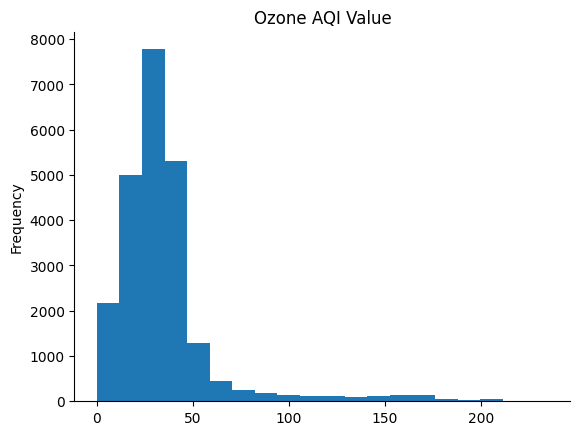

In [6]:
# @title Ozone AQI Value

from matplotlib import pyplot as plt
data['Ozone AQI Value'].plot(kind='hist', bins=20, title='Ozone AQI Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

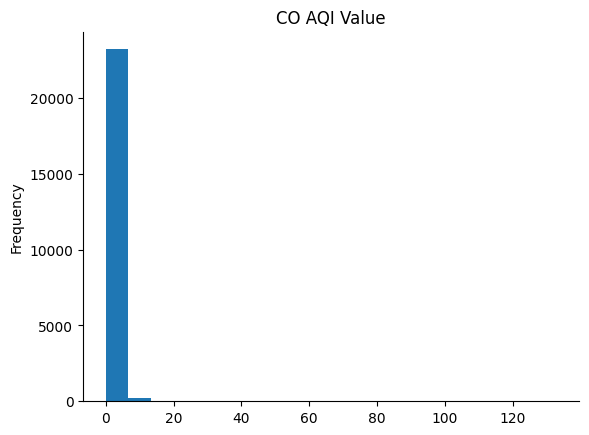

In [5]:
# @title CO AQI Value

from matplotlib import pyplot as plt
data['CO AQI Value'].plot(kind='hist', bins=20, title='CO AQI Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

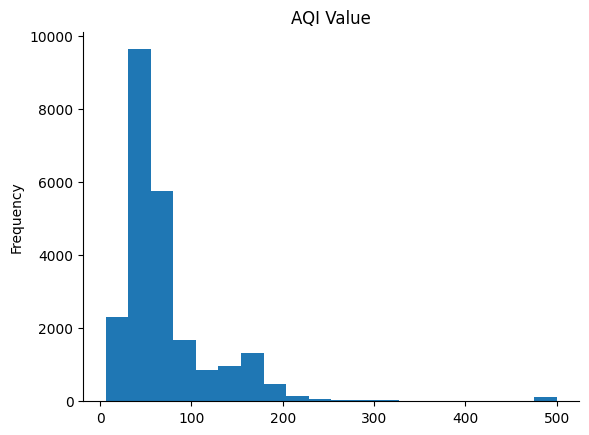

In [4]:
# @title AQI Value

from matplotlib import pyplot as plt
data['AQI Value'].plot(kind='hist', bins=20, title='AQI Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

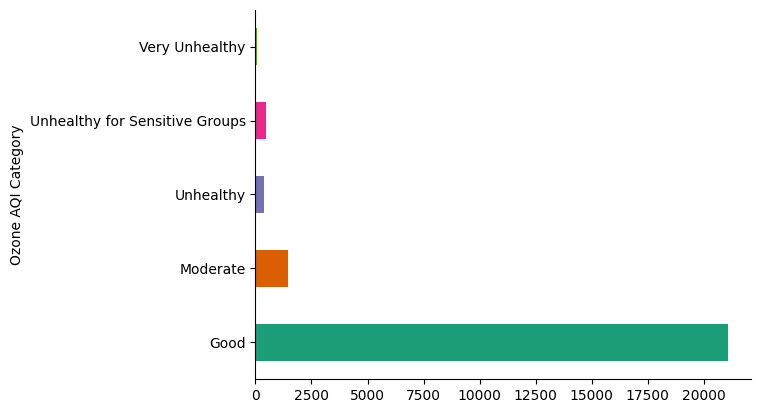

In [15]:
# @title Ozone AQI Category
data.groupby('Ozone AQI Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: use previous data and output and write code for detection which city and country is having them divide by there CO level.

# Group by City and Country and calculate the average CO AQI Value
average_co_by_location = data.groupby(['City', 'Country'])['CO AQI Value'].mean().reset_index()

# Display the resulting DataFrame
print(average_co_by_location)

# Find the city and country with the highest average CO AQI Value
highest_co_location = average_co_by_location.loc[average_co_by_location['CO AQI Value'].idxmax()]

print("\nCity and Country with the highest average CO AQI Value:")
highest_co_location

In [20]:
# Group data by city and country and then by AQI Category
grouped_data = data.groupby(['City', 'Country', 'AQI Category']).size().reset_index(name='Count')

# You can now print or display this grouped data to see which cities/countries
# have which AQI levels.
print("City and Country AQI Level Distribution:")
print(grouped_data)

# Optionally, you can filter to see specific categories, e.g., only 'Unhealthy'
unhealthy_cities = grouped_data[grouped_data['AQI Category'] == 'Unhealthy']
print("\nCities and Countries with Unhealthy AQI:")
print(unhealthy_cities)

# You could also iterate through the grouped data and perform actions for each group
# For example, print the cities/countries for each AQI category
print("\nCities and Countries by AQI Category:")
for category in grouped_data['AQI Category'].unique():
  print(f"\n--- {category} ---")
  cities_in_category = grouped_data[grouped_data['AQI Category'] == category]
  print(cities_in_category[['City', 'Country', 'Count']])

City and Country AQI Level Distribution:
              City      Country AQI Category  Count
0         A Coruna        Spain         Good      1
1         Aabenraa      Denmark         Good      1
2           Aachen      Germany     Moderate      1
3          Aalborg      Denmark         Good      1
4          Aalburg  Netherlands         Good      1
...            ...          ...          ...    ...
23031  Zwijndrecht  Netherlands         Good      1
23032       Zwolle  Netherlands         Good      1
23033      Zwonitz      Germany     Moderate      1
23034     Zyrardow       Poland     Moderate      1
23035   Zyryanovsk   Kazakhstan         Good      1

[23036 rows x 4 columns]

Cities and Countries with Unhealthy AQI:
             City                     Country AQI Category  Count
14            Aba                     Nigeria    Unhealthy      1
15         Abadan  Iran (Islamic Republic of)    Unhealthy      1
35       Abeokuta                     Nigeria    Unhealthy      1
39 

              City      Country  Ozone AQI Value
0         A Coruna        Spain             27.0
1         Aabenraa      Denmark             38.0
2           Aachen      Germany             43.0
3          Aalborg      Denmark             46.0
4          Aalburg  Netherlands             30.0
...            ...          ...              ...
23031  Zwijndrecht  Netherlands             39.0
23032       Zwolle  Netherlands             30.0
23033      Zwonitz      Germany             46.0
23034     Zyrardow       Poland             35.0
23035   Zyryanovsk   Kazakhstan             16.0

[23036 rows x 3 columns]

Sorted by Ozone AQI Value (Highest to Lowest):
                     City                     Country  Ozone AQI Value
6019           Eslamshahr  Iran (Islamic Republic of)            235.0
9456                Karaj  Iran (Islamic Republic of)            222.0
16490                 Qom  Iran (Islamic Republic of)            214.0
17090         Robat Karim  Iran (Islamic Republic of) 

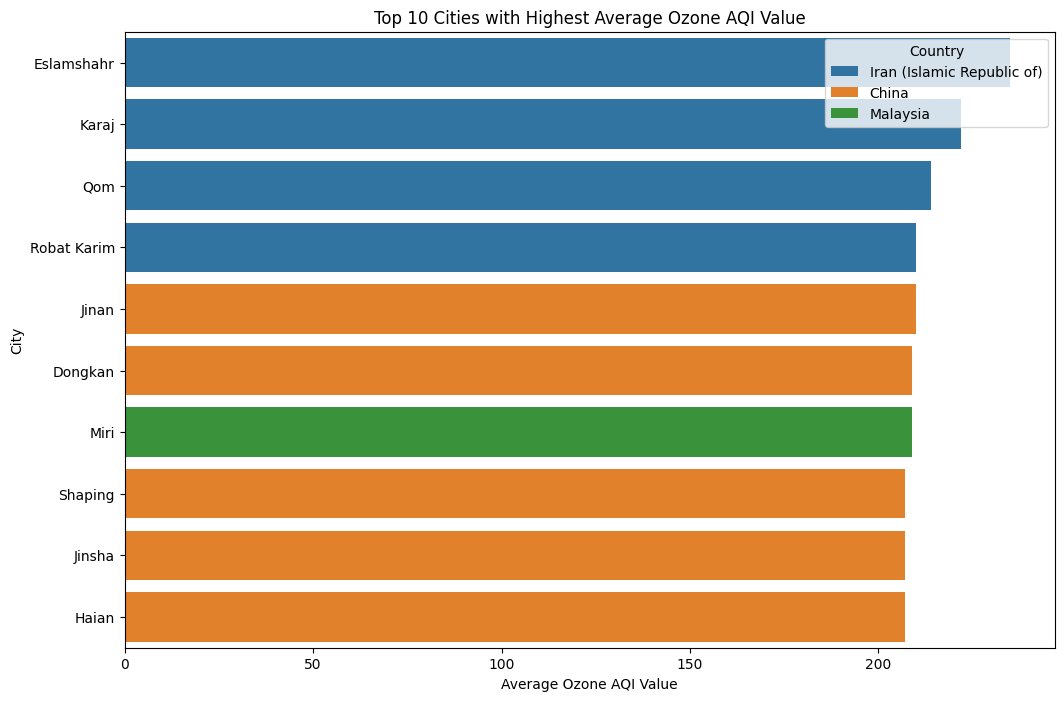

In [21]:
# Group by city and country and calculate the average Ozone AQI Value
ozone_by_location = data.groupby(['City', 'Country'])['Ozone AQI Value'].mean().reset_index()

# Print the data
print(ozone_by_location)

# You can also sort the data to see which locations have the highest/lowest ozone levels
ozone_by_location_sorted = ozone_by_location.sort_values(by='Ozone AQI Value', ascending=False)
print("\nSorted by Ozone AQI Value (Highest to Lowest):")
print(ozone_by_location_sorted)

# You could also visualize this data
plt.figure(figsize=(12, 8))
sns.barplot(data=ozone_by_location_sorted.head(10), x='Ozone AQI Value', y='City', hue='Country', dodge=False)
plt.title('Top 10 Cities with Highest Average Ozone AQI Value')
plt.xlabel('Average Ozone AQI Value')
plt.ylabel('City')
plt.show()

In [22]:
# Group by City and Country and calculate the average CO AQI Value
average_co_by_location = data.groupby(['City', 'Country'])['CO AQI Value'].mean().reset_index()

# Display the resulting DataFrame
print(average_co_by_location)

# Find the city and country with the highest average CO AQI Value
highest_co_location = average_co_by_location.loc[average_co_by_location['CO AQI Value'].idxmax()]

print("\nCity and Country with the highest average CO AQI Value:")
highest_co_location

              City      Country  CO AQI Value
0         A Coruna        Spain           0.0
1         Aabenraa      Denmark           1.0
2           Aachen      Germany           1.0
3          Aalborg      Denmark           1.0
4          Aalburg  Netherlands           0.0
...            ...          ...           ...
23031  Zwijndrecht  Netherlands           1.0
23032       Zwolle  Netherlands           1.0
23033      Zwonitz      Germany           1.0
23034     Zyrardow       Poland           1.0
23035   Zyryanovsk   Kazakhstan           1.0

[23036 rows x 3 columns]

City and Country with the highest average CO AQI Value:


,5581
City,Durango
Country,United States of America
CO AQI Value,133.0
